In [17]:
# !pip install yfinance
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import pandas as pd

In [19]:
import yfinance as yf

In [96]:
# Define the stock symbols
symbols = {
    "NFLX": "NFLX",
    "BA": "BA",
    "T": "T",
    "MGM": "MGM",
    "TSLA": "TSLA",
    "sp500": "^GSPC"
}

In [98]:
# Define the date range
start_date = "2013-01-01"
end_date = "2023-01-01"

In [100]:
# Fetch the data
data = {}
for symbol, ticker in symbols.items():
    data[symbol] = yf.download(ticker, start=start_date, end=end_date)["Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [102]:
# Create a DataFrame
df = pd.DataFrame(data)

# Reset the index to have 'Date' as a column
df.reset_index(inplace=True)

In [104]:
# Print the DataFrame
df

Date        NFLX          BA          T        MGM        TSLA  \
0    2013-01-02   13.144286   77.070000  26.435045  12.270000    2.357333   
1    2013-01-03   13.798571   77.470001  26.450151  12.460000    2.318000   
2    2013-01-04   13.711429   77.690002  26.608761  12.640000    2.293333   
3    2013-01-07   14.171429   76.129997  26.729607  12.680000    2.289333   
4    2013-01-08   13.880000   74.129997  25.944109  12.950000    2.245333   
...         ...         ...         ...        ...        ...         ...   
2513 2022-12-23  294.959991  189.059998  18.309999  33.820000  123.150002   
2514 2022-12-27  284.170013  189.399994  18.459999  33.869999  109.099998   
2515 2022-12-28  276.880005  188.380005  18.219999  32.430000  112.709999   
2516 2022-12-29  291.119995  188.910004  18.450001  33.259998  121.820000   
2517 2022-12-30  294.880005  190.490005  18.410000  33.529999  123.180000   

            sp500  
0     1462.420044  
1     1459.369995  
2     1466.469971  
3     1461.890015  
4     1457.150024  
...           ...  
2513  3844.820068  
2514  3829.250000  
2515  3783.219971  
2516  3849.280029  
2517  3839.500000  

[2518 rows x 7 columns]

In [106]:
# Remove missing values
df.dropna(inplace=True)

In [108]:
# Describe the data
df.describe()

Date         NFLX           BA            T  \
count                           2518  2518.000000  2518.000000  2518.000000   
mean   2017-12-31 20:04:23.065925120   239.053170   202.038511    25.124129   
min              2013-01-02 00:00:00    13.144286    73.650002    14.630000   
25%              2015-07-03 00:00:00    89.404287   132.190002    22.620846   
50%              2017-12-31 00:00:00   190.705002   167.410004    25.592901   
75%              2020-07-01 18:00:00   361.797501   254.082504    27.620846   
max              2022-12-30 00:00:00   691.690002   440.619995    32.832325   
std                              NaN   174.233526    89.802910     3.633389   

               MGM         TSLA        sp500  
count  2518.000000  2518.000000  2518.000000  
mean     27.350437    73.102271  2742.695377  
min       7.140000     2.194000  1457.150024  
25%      21.620001    14.544000  2050.752441  
50%      26.830000    18.954333  2584.900024  
75%      32.237500    79.093498  3275.690002  
max      50.369999   409.970001  4796.560059  
std       7.983780   101.969056   872.793493

In [110]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   NFLX    2518 non-null   float64       
 2   BA      2518 non-null   float64       
 3   T       2518 non-null   float64       
 4   MGM     2518 non-null   float64       
 5   TSLA    2518 non-null   float64       
 6   sp500   2518 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 137.8 KB


In [112]:
# Average price of each stock
for symbol in symbols:
    avg_price = df[symbol].mean()
    print(f"Average price of {symbol}: {avg_price:.2f}")


Average price of NFLX: 239.05
Average price of BA: 202.04
Average price of T: 25.12
Average price of MGM: 27.35
Average price of TSLA: 73.10
Average price of sp500: 2742.70


In [114]:
# Function to normalize the prices based on the initial price
def normalize(data):
    x = data.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

normalize(df)

Date       NFLX        BA         T       MGM       TSLA     sp500
0    2013-01-02   1.000000  1.000000  1.000000  1.000000   1.000000  1.000000
1    2013-01-03   1.049777  1.005190  1.000571  1.015485   0.983315  0.997914
2    2013-01-04   1.043147  1.008045  1.006571  1.030155   0.972851  1.002769
3    2013-01-07   1.078144  0.987803  1.011143  1.033415   0.971154  0.999638
4    2013-01-08   1.055972  0.961853  0.981429  1.055420   0.952489  0.996396
...         ...        ...       ...       ...       ...        ...       ...
2513 2022-12-23  22.440168  2.453095  0.692641  2.756316  52.241242  2.629081
2514 2022-12-27  21.619281  2.457506  0.698315  2.760391  46.281116  2.618434
2515 2022-12-28  21.064667  2.444272  0.689237  2.643032  47.812507  2.586959
2516 2022-12-29  22.148026  2.451148  0.697937  2.710676  51.677045  2.632130
2517 2022-12-30  22.434083  2.471649  0.696424  2.732681  52.253968  2.625443

[2518 rows x 7 columns]

In [116]:
# Function to plot interactive plot
def interactive_plot(data, title):
    fig = px.line(title = title)
    for i in data.columns[1:]:
        fig.add_scatter(x = data['Date'], y = data[i], name = i)
    fig.show()

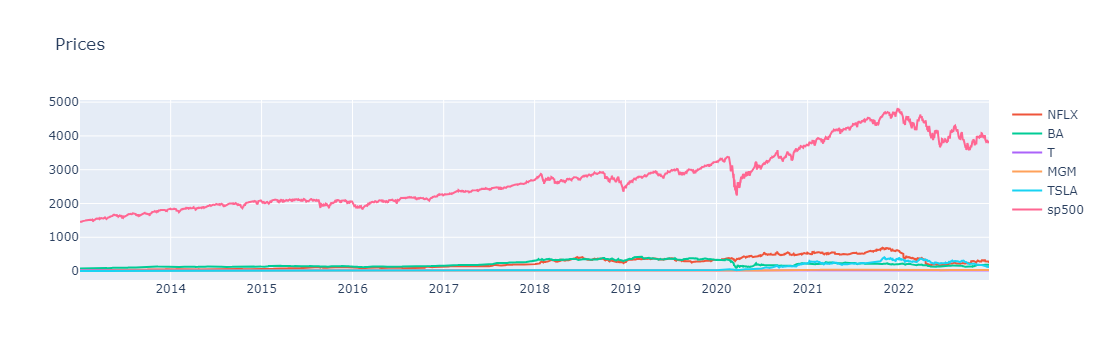

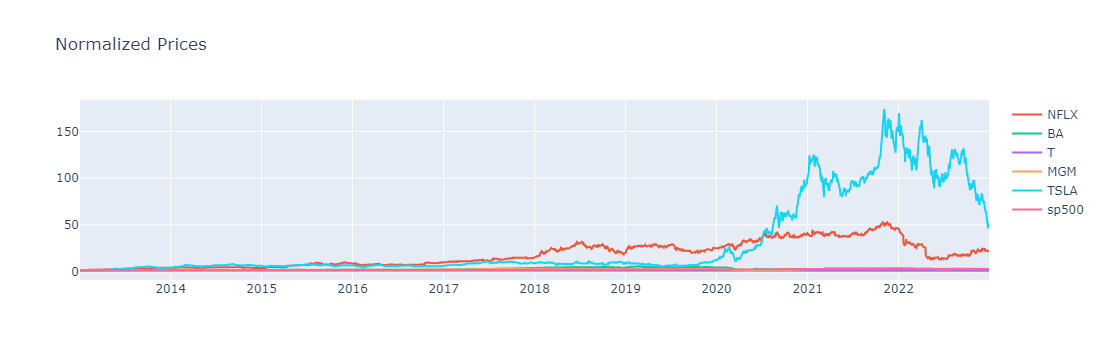

In [118]:
# Plot interactive chart
interactive_plot(df, 'Prices')

# Plot normalized interactive chart
interactive_plot(normalize(df),'Normalized Prices')

In [183]:
# Function to calculate the daily returns in percentage


def daily_return(data):
    data_daily_returns = data.copy()
    
    for col in data.columns[1:]:
        data_daily_returns[col] = (data[col] / data[col].shift(1) - 1) * 100
        data_daily_returns.loc[0, col] = 0  # Setting the first day's return to 0
    
    return data_daily_returns
            

In [185]:
daily_return(df)

Date      NFLX        BA         T       MGM       TSLA     sp500
0    2013-01-02  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000
1    2013-01-03  4.977710  0.519011  0.057145  1.548489  -1.668533 -0.208562
2    2013-01-04 -0.631529  0.283982  0.599654  1.444625  -1.064151  0.486510
3    2013-01-07  3.354866 -2.007987  0.454158  0.316455  -0.174416 -0.312312
4    2013-01-08 -2.056452 -2.627085 -2.938680  2.129334  -1.921964 -0.324237
...         ...       ...       ...       ...       ...        ...       ...
2513 2022-12-23 -0.937031  0.430278  0.218933  0.207407  -1.755083  0.586810
2514 2022-12-27 -3.658116  0.179835  0.819222  0.147839 -11.408853 -0.404962
2515 2022-12-28 -2.565369 -0.538537 -1.300107 -4.251546   3.308892 -1.202064
2516 2022-12-29  5.143019  0.281346  1.262357  2.559352   8.082691  1.746133
2517 2022-12-30  1.291567  0.836378 -0.216807  0.811787   1.116402 -0.254074

[2518 rows x 7 columns]

In [121]:
# Select any stock, let's say Apple 
stocks_daily_returns = daily_return(df)

In [122]:
stocks_daily_returns['NFLX']

0       0.000000
1       4.977710
2      -0.631529
3       3.354866
4      -2.056452
          ...   
2513   -0.937031
2514   -3.658116
2515   -2.565369
2516    5.143019
2517    1.291567
Name: NFLX, Length: 2518, dtype: float64

In [128]:
stocks_daily_returns['sp500']

0       0.000000
1      -0.208562
2       0.486510
3      -0.312312
4      -0.324237
          ...   
2513    0.586810
2514   -0.404962
2515   -1.202064
2516    1.746133
2517   -0.254074
Name: sp500, Length: 2518, dtype: float64

<Axes: xlabel='sp500', ylabel='NFLX'>

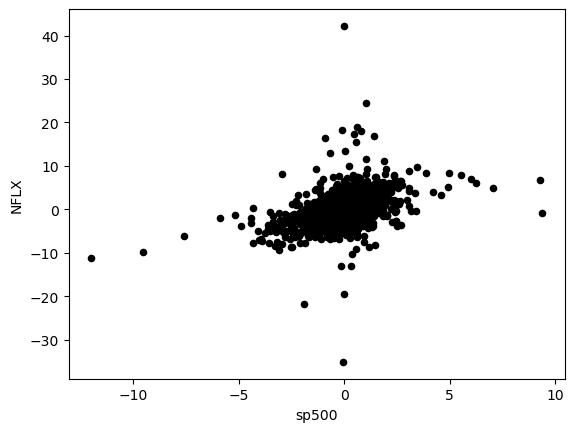

In [130]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_returns.plot(kind = 'scatter', x = 'sp500', y = 'NFLX', color = 'black')

In [132]:
# Fit a polynomial between Netflix and sp500

beta, alpha = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns['NFLX'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('NFLX', beta, alpha))  

Beta for NFLX stock is = 1.1661250116099389 and alpha is = 0.11663276149595579


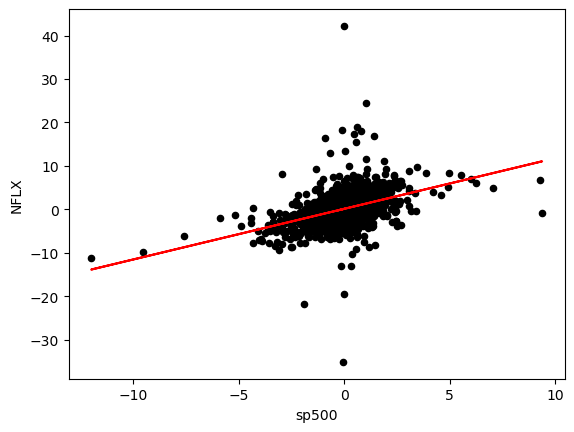

In [134]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_returns.plot(kind = 'scatter', x = 'sp500', y = 'NFLX', color = 'black')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_returns['sp500'], beta * stocks_daily_returns['sp500'] + alpha, '-', color = 'r')

In [150]:
# Calculate daily returns for each stock
returns = df[symbols.keys()].pct_change().dropna()

# Calculate beta for each stock relative to S&P500 (^GSPC)
results = {}
for symbol in symbols.keys():
    if symbol != 'sp500':  # Skip calculating beta for the S&P500 itself
        beta, _ = np.polyfit(returns['sp500'], returns[symbol], 1)
        results[symbol] = {
            'beta': beta,
            'alpha': None  # You can calculate alpha if needed
        }

# Print results
for symbol, data in results.items():
    print(f"Stock: {symbol}, Beta: {data['beta']:.4f}")

Stock: NFLX, Beta: 1.1661
Stock: BA, Beta: 1.3800
Stock: T, Beta: 0.6652
Stock: MGM, Beta: 1.5910
Stock: TSLA, Beta: 1.4094


Beta for NFLX stock is = 1.1661250116099389 and alpha is = 0.11663276149595579


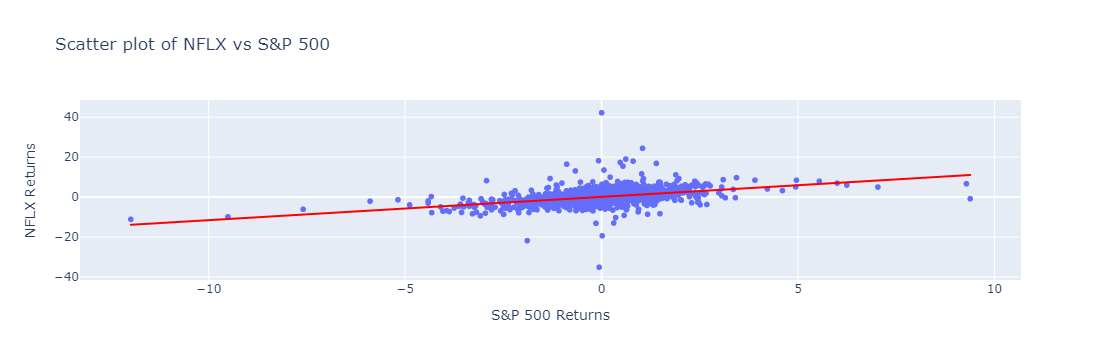

Beta for BA stock is = 1.3800029505573104 and alpha is = 0.004623567303310972


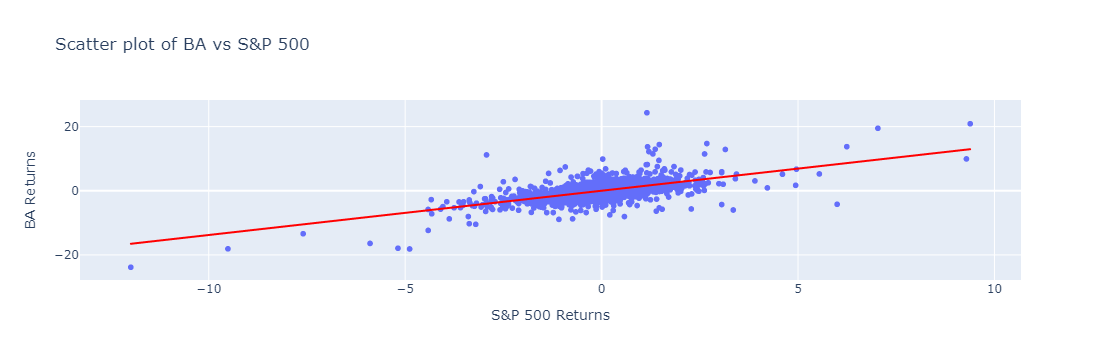

Beta for T stock is = 0.6651590860696851 and alpha is = -0.03491785638033191


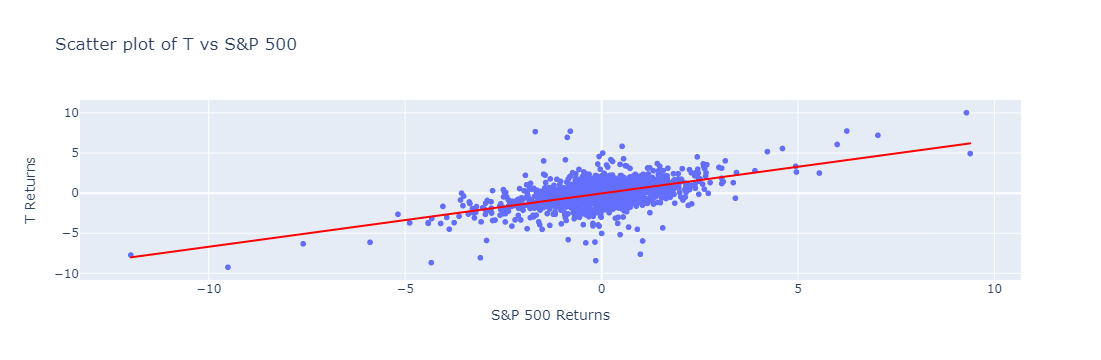

Beta for MGM stock is = 1.590994828039686 and alpha is = 0.009149215858753397


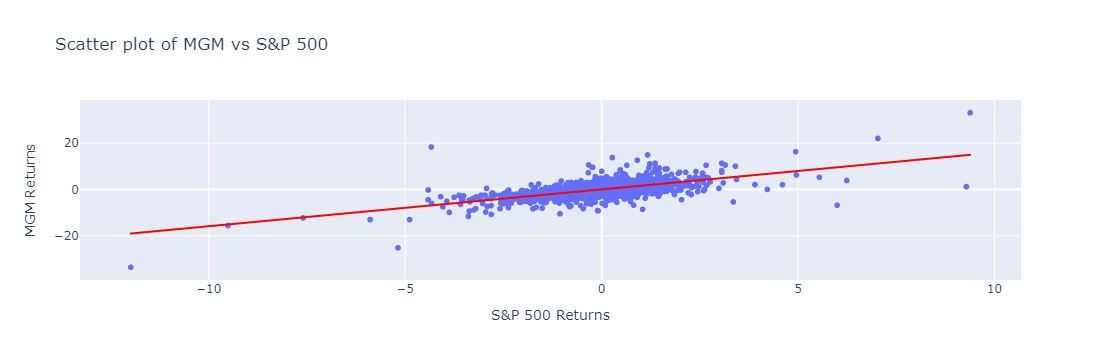

Beta for TSLA stock is = 1.409449024499713 and alpha is = 0.1589159444217777


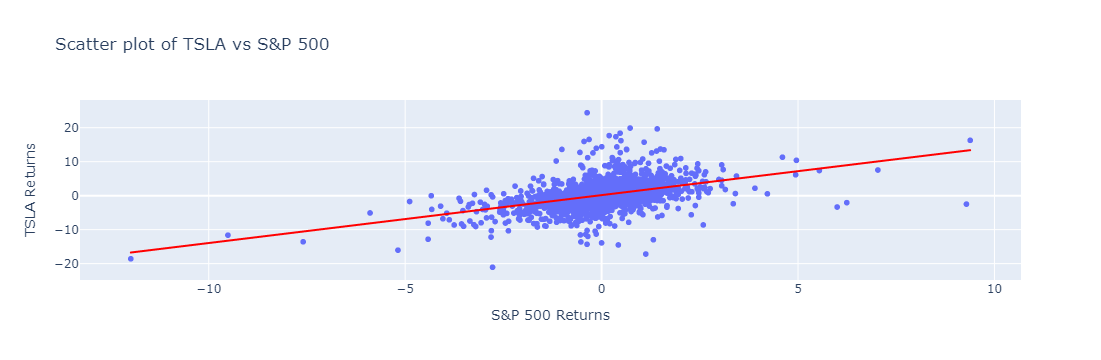

In [154]:
# Now doing the same for all the stocks

for symbol, stock in symbols.items():
    if stock == "^GSPC":
        continue
    
    # Calculate beta and alpha
    beta1, alpha = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[stock], 1)
    print('Beta for {} stock is = {} and alpha is = {}'.format(stock, beta1, alpha))
    
    # Plot the scatter plot and the regression line
    fig = px.scatter(stocks_daily_returns, x='sp500', y=stock, trendline='ols', trendline_color_override='red',
                 labels={'sp500': 'S&P 500 Returns', stock: f'{stock} Returns'},
                 title=f'Scatter plot of {stock} vs S&P 500')
    fig.update_layout(title_text=f'Scatter plot of {stock} vs S&P 500', xaxis_title='S&P 500 Returns', yaxis_title=f'{stock} Returns')
    fig.show()

In [189]:
results = {}
for symbol in symbols.keys():
    if symbol != 'sp500':
        beta, alpha = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[symbol], 1)
        results[symbol] = {
            'Beta': beta,
            'Alpha': alpha
        }
        # Calculate expected return using CAPM
        rf = 0.02  # Assuming a risk-free rate of 2%
        rm = stocks_daily_returns['sp500'].mean() * 252 / 100  # Annualized return of S&P 500
        ER = rf + (beta * (rm - rf))
        results[symbol]['Expected Return (CAPM)'] = ER

        # Actual return for the stock
        actual_return = stocks_daily_returns[symbol].mean() * 252 / 100

        # Compare expected and actual returns
        results[symbol]['Actual Return'] = actual_return

# Print results
for symbol, result in results.items():
    print(f"\nStock: {symbol}")
    print(f"Beta: {result['Beta']:.2f}")
    print(f"Alpha: {result['Alpha']:.2f}")
    print(f"Expected Return (CAPM): {result['Expected Return (CAPM)']:.2%}")
    print(f"Actual Return: {result['Actual Return']:.2%}")


Stock: NFLX
Beta: 1.17
Alpha: 0.12
Expected Return (CAPM): 12.74%
Actual Return: 42.47%

Stock: BA
Beta: 1.38
Alpha: 0.00
Expected Return (CAPM): 14.72%
Actual Return: 16.64%

Stock: T
Beta: 0.67
Alpha: -0.03
Expected Return (CAPM): 8.13%
Actual Return: -1.34%

Stock: MGM
Beta: 1.59
Alpha: 0.01
Expected Return (CAPM): 16.66%
Actual Return: 20.15%

Stock: TSLA
Beta: 1.41
Alpha: 0.16
Expected Return (CAPM): 14.99%
Actual Return: 55.85%
